Welcome to Crystal Feng's Evaluation Program.

This dataset has 10 features (not including the class attribute), with 100 instances.



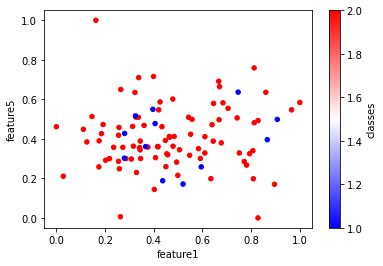

In [53]:
import math
import time
import sys
import numpy as np
from sympy import numer
import csv
import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn


def main():
    print("Welcome to Crystal Feng's Evaluation Program.\n")
    dataset = int(input("Which data set would you like to use?\n"
                            "1. Small\n"
                            "2. Large\n"))
    
    if(dataset == 1):
        file = open('CS170_Spring_2022_Small_data__22.txt', 'r')
    elif(dataset == 2):
        file = open('CS170_Spring_2022_Large_data__22.txt', 'r')

    
    # x = input("\nEnter the features you want to use seperated by spaces\n")
        
    # features = x.split(' ')

    # for i in range(len(features)):
    #     features[i]= int(features[i])

    # print(features)

    # printnorm(file)
    plotex(file)
    # forward(file)
    # accuracy(file, features)

def accuracy(file, current_set):
    start_time = time.time()
    #open file
    number_correctly_classified = 0
    
    current_set.append(0)
    
    data = []

    #source on how to convert txt data into matrix
    #https://stackoverflow.com/questions/48833873/turn-txt-file-into-matrix-of-ints-in-python
    for row in file:
        data.append([float(x) for x in row.split()])

    data = normalize(data)
    
    
    for i in range(len(data)):
        #source on how to 0 out columns
        #https://stackoverflow.com/questions/36338927/how-to-zero-specific-column-of-2d-array
        for j in range(len(data[i])):
            if not j in current_set:
                data[i][j] = 0 
        
    for i in range(len(data)):

        object_to_clasify = []
        for j in range(len(data[i])):
            if(j != 0):
                object_to_clasify.append(data[i][j])

        label_object_to_classify = data[i][0]
        
        # print("Looping over i, at the " + str(i+1) + " location\n")
        # print("The " + str(i+1) + "th object is in class " + str(label) + "\n")
        
        nearest_neighbor_distance = float('inf')
        nearest_neighbor_location = float('inf')
        nearest_neighbor_label = None
        for j in range(len(data)):
            
            if i != j :
                # print("Ask if " + str(i+1) + " is nearest neighbor with " + str(j+1))
                compare = []
                for k in range(len(data[i])):
                    if(k != 0):
                        compare.append(data[j][k])
                
                distance = euclidean(object_to_clasify, compare)
                
                if distance < nearest_neighbor_distance:
                    # print("euclidean distance " + str(distance))
                    nearest_neighbor_distance = distance
                    nearest_neighbor_location = j
                    nearest_neighbor_label = data[nearest_neighbor_location][0]

        # print("object " + str(i+1) +"'s label is " + str(label_object_to_classify) +"\nits nearest neighbors is object " + str(nearest_neighbor_location+1)+ " with label " + str(nearest_neighbor_label))
        # print("Time to compute = " + str(time.time() - start_time) + " seconds\n\n")
        if label_object_to_classify == nearest_neighbor_label:
            number_correctly_classified += 1
    
    accuracy = number_correctly_classified/len(data)
    print("\nAccuracy is " + str(accuracy*100) + "%")


    
def plotex(file):
    data = matrix(file)
    df = pd.DataFrame(data, columns= ['classes', 'feature1', 'feature2', 'feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10'])

    # df = pd.DataFrame(data, columns= ['classes', 'feature1', 'feature2', 'feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10','feature11', 'feature12', 'feature13','feature14','feature15','feature16','feature17','feature18','feature19','feature20','feature21', 'feature22', 'feature23','feature24','feature25','feature26','feature27','feature28','feature29','feature30','feature31', 'feature32', 'feature33','feature34','feature35','feature36','feature37','feature38','feature39','feature40'])
    

    fig, ax = plt.subplots()
    df.plot(kind='scatter',x='feature1', y='feature5',c='classes',colormap='bwr', ax=ax)
    ax.set_xlabel("feature1")
    plt.show()
    

    # ax = df.plot.scatter(x = 'feature1', 
    #                y = 'feature2', 
    #                c='classes',colormap='viridis')
    # ax.set_xlabel("feature2")
       

def printnorm(file):

    data1 = []

    #source on how to convert txt data into matrix
    #https://stackoverflow.com/questions/48833873/turn-txt-file-into-matrix-of-ints-in-python
    for row in file:
        data1.append([float(x) for x in row.split()])

    data = normalize(data1)

    for i in range(len(data[0])):
        if i > 0:
            min = sys.maxsize
            max = -sys.maxsize -1

            for j in range(len(data)):
                if data[j][i] < min:
                    min = data[j][i]
                if data[j][i] > max:
                    max = data[j][i]
        
            print("for col " + str(i) + " the min is " +str(min) + " and the max is" + str(max) + "\n")


    with open("output.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(data)

def forward(file):
    fset = []
    realbest = 0
    print("Beginning Search\n")

    data = matrix(file)

    for i in range(1,len(data[0])):
        best = 0
        curr = []
        for j in range(1,len(data[0])):
            if j != i:
                curr = [i,j]
                    
                # print("++Consider adding the " + str(j) + " feature\n")
                accuracy = calcaccuracy(data, curr)
                
                print("Using features(s) " + str(curr) + " accuracy is " + str(accuracy) + "%\n")
                
                if accuracy > best:
                    best = accuracy
                    bestset = curr
        if(best > realbest):
            fset = bestset
            realbest = best
        print("\nFeature set " + str(bestset) + " was best, accuracy is " + str(best) + "%\n\n")


def calcaccuracy(matrix, current_set):
    # start_time = time.time()
    #open file
    number_correctly_classified = 0
    
    data = copy.deepcopy(matrix)
    
    for i in range(len(data)):
        #source on how to 0 out columns
        #https://stackoverflow.com/questions/36338927/how-to-zero-specific-column-of-2d-array
        if(current_set):
            for j in range(len(data[i])):
                if not j in current_set and j != 0:
                    data[i][j] = 0 
        
    for i in range(len(data)):

        object_to_clasify = []
        for j in range(len(data[i])):
            if(j != 0):
                object_to_clasify.append(data[i][j])

        label_object_to_classify = data[i][0]
        
        # print("Looping over i, at the " + str(i+1) + " location\n")
        # print("The " + str(i+1) + "th object is in class " + str(label) + "\n")
        
        nearest_neighbor_distance = float('inf')
        nearest_neighbor_location = float('inf')
        nearest_neighbor_label = None
        for j in range(len(data)):
            
            if i != j :
                # print("Ask if " + str(i+1) + " is nearest neighbor with " + str(j+1))
                compare = []
                for k in range(len(data[i])):
                    if(k != 0):
                        compare.append(data[j][k])
                
                distance = euclidean(object_to_clasify, compare)
                
                if distance < nearest_neighbor_distance:
                    # print("euclidean distance " + str(distance))
                    nearest_neighbor_distance = distance
                    nearest_neighbor_location = j
                    nearest_neighbor_label = data[nearest_neighbor_location][0]

        # print("object " + str(i+1) +"'s label is " + str(label_object_to_classify) +"\nits nearest neighbors is object " + str(nearest_neighbor_location+1)+ " with label " + str(nearest_neighbor_label))
        # print("Time to compute = " + str(time.time() - start_time) + " seconds\n\n")
        if label_object_to_classify == nearest_neighbor_label:
            number_correctly_classified += 1
    
    accuracy = number_correctly_classified/len(data)
    # print("\nAccuracy is " + str(accuracy*100) + "%")
    return accuracy*100

def euclidean(x, y):
    sum = 0
    # print(x)
    # print(y)
    for i in range(len(x)):
        dif = x[i] -y[i]
        square = pow(dif,2)
        sum += square
    dist = math.sqrt(sum)
    return dist

def normalize(data):
    for i in range(len(data[0])):
        if i > 0:
            min = sys.maxsize
            max = -sys.maxsize -1

            for j in range(len(data)):
                if data[j][i] < min:
                    min = data[j][i]
                if data[j][i] > max:
                    max = data[j][i]
        
            denominator = max - min

            for k in range(len(data)):
                numerator = data[k][i] - min
                data[k][i] = numerator/denominator

    return data

def matrix(file):
    data = []

    #source on how to convert txt data into matrix
    #https://stackoverflow.com/questions/48833873/turn-txt-file-into-matrix-of-ints-in-python
    for row in file:
        data.append([float(x) for x in row.split()])

    print("This dataset has " + str(len(data[0])-1) + " features (not including the class attribute), with " + str(len(data)) + " instances.\n")

    data = normalize(data)

    return data

if __name__ == '__main__':
    main()


